# **UFC Sales Comparison**

My goal for this presentation to investigate a few factors that in the PPV sales, namely factors that may drive future PPV sales in the future. For this project I will be looking into a few key moments in history with the most famous rivalries and the aftermath from the first cable televised UFC event, all to see if any of these elements played a role in increasing future PPV Sales.

Here's a list of the rivalries and UFC events that stemmed from them:
  Ken Shamrock v. Tito Ortiz UFC 40 and 61

  Chuck Liddell v. Tito Ortiz UFC 47 and 66

  George St. Pierre v. Matt Hughes UFC 65 and 79

  Frank Mir v. Brock Lesnar UFC 81 and 100

  Quinton Jackson v. Wanderlei Silva UFC 92

  Anderson Silva v. Chael Sonnen UFC 117 and 148

  Dominick Cruz v. Urijah Faber UFC 132

  Ronda Rousey v. Miesha Tate UFC 168

  Jon Jones v. Daniel Cormier UFC 182 and 214

  UFC 52 was the first PPV right after "The Ultimate Fighter" had their first finale.

  I will be look at the events surrounding each of these events listed to decipher if there is a profitable correlation in the promotions history.


# Uploading and peeking into the data set

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import & alias modules
import math
import numpy as np 
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt

import missingno as msno
import altair as alt

import os

sns.set()

import sklearn
from shapely.geometry import Point, Polygon
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
# Build Dataframe
import pandas as pd

df = pd.read_csv("/content/gdrive/My Drive/Thinkful/UFC_data_raw.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (153,155,156,157) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Basic data info
UFC = pd.read_csv("/content/gdrive/My Drive/Thinkful/UFC_data_raw.csv")

UFC.info()

In [ ]:
# Peek into UFC DF
df.head()

,Date,UFC_#,R_fighter,B_fighter,Referee,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,...,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,PPV_Sales,Date.1,UFC_Number,Opponent1,Opponent2,PPV
0,9/28/2001,33.0,Tito Ortiz,Vladimir Matyushenko,John McCarthy,"Las Vegas, Nevada, USA",Red,True,Light Heavyweight,5,0,1,0,6.0,5.0,1.0,1.0,2.0,1.0,25.0,15.0,22.0,12.0,0.0,0.0,0.0,4.0,0.0,28.0,17.0,0.60,0.0,3.0,3.0,1.0,146.0,119.0,1,0,3.0,...,0.666667,0.666667,9.333333,2.777778,0.111111,4.0,2.555556,0.0,0.111111,15.0,6.333333,0.288889,0.555556,0.222222,0.0,0.000,56.888889,47.222222,17,517.333333,6,0,0,1,4,1,1,7,Orthodox,190.50,187.96,205,30.0,26.0,"$75,000",9/28/2001,33.0,Ortiz,Matyushenko,75000
1,9/28/2001,33.0,Jens Pulver,Dennis Hallman,Mario Yamasaki,"Las Vegas, Nevada, USA",Red,True,Lightweight,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1.0,...,3.200000,1.600000,36.200000,11.800000,0.000000,10.0,6.000000,0.4,0.000000,52.0,21.800000,0.330000,0.000000,9.000000,1.0,0.134,66.400000,34.800000,13,695.200000,1,0,0,2,2,0,0,4,Southpaw,170.18,177.80,145,25.0,26.0,"$75,000",11/2/2001,34.0,Couture,Rizzo,65000
2,9/28/2001,33.0,Chuck Liddell,Murilo Bustamante,John McCarthy,"Las Vegas, Nevada, USA",Red,False,Light Heavyweight,3,0,1,0,1.0,1.0,2.0,2.0,1.0,0.0,18.0,9.0,20.0,10.0,0.0,0.0,0.0,7.0,0.0,21.0,11.0,0.52,1.0,4.0,4.0,1.0,37.0,23.0,1,0,0.0,...,0.200000,0.200000,12.200000,2.800000,0.000000,1.4,1.400000,0.4,0.000000,15.2,5.600000,0.392000,0.600000,6.400000,1.0,0.294,19.400000,9.800000,7,530.200000,0,0,0,2,1,0,1,4,Orthodox,187.96,193.04,205,35.0,31.0,"$75,000",1/11/2002,35.0,Pulver,Penn,35000
3,9/28/2001,33.0,Matt Serra,Yves Edwards,Mario Yamasaki,"Las Vegas, Nevada, USA",Red,False,Welterweight,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,11.000000,2.000000,17.000000,6.000000,2.000000,9.0,6.000000,0.0,2.000000,33.0,18.000000,0.540000,0.000000,3.000000,2.0,0.660,65.000000,49.000000,3,891.000000,0,0,0,0,0,0,0,0,Orthodox,167.64,172.72,170,24.0,27.0,"$75,000",3/22/2002,36.0,Couture,Barnett,55000
4,9/28/2001,33.0,Dave Menne,Gil Castillo,John McCarthy,"Las Vegas, Nevada, USA",Red,True,Middleweight,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,0.000000,0.000000,16.000000,4.000000,0.000000,2.0,2.000000,0.0,0.000000,22.0,8.000000,0.360000,0.000000,12.000000,1.0,0.080,61.000000,44.000000,3,900.000000,0,0,0,1,0,0,0,1,Orthodox,177.80,NaN,170,35.0,27.0,"$75,000",5/10/2002,37.0,Lindland,Bustamante,50000


While looking through the data in its current form I found multiple columns that were void of data, other columns that were just straight unnecessary, and the PPV column at the end needs a little character cleaning.

# Peeking and cleaning the data

In [ ]:
# Isolating null values, dropping empty columns
# and empty values not holding stat values
df.isnull()

In [ ]:
# Dropping all rows where PPV_Sales are null
df.dropna(subset=['PPV_Sales'])

In [ ]:
# Dropping all null values in the PPV column
df.dropna(subset=['PPV'])

In [ ]:
# Dropping Unnamed columns, and other columns to the right of those columns
df.drop(['date', 'Unnamed: 148', 'Unnamed: 149', 'Year', 'Month', 'Day'], axis=1, inplace=True)
print('The columns of the DataFrame after deleting inplace')
print(df.columns)

In [ ]:
# Replacing other existing null values with a 0.0
df.fillna('0.0')

In [ ]:
# Dropping special characters from PPV column
df.PPV=df.PPV.str.replace('[$,,,]','') 
print(df.PPV)

# Initial Findings

Soon after looking into the data I realized I needed a deeper look. I decided to call out the UFC_Number and PPV columns and build a dictionary for a better visual to compare the events above against all of the other events.

In [ ]:
# Dataframe shape
df.shape

# Basic stats
df.describe()
# From these numbers below we see clearly the longest winning streaks are 13(B) and 16(R) wins in a row.
# Blue KO(11) and Submission (10) and Red has KO(11) and Submission (9)
# These are somewhat significant for me because these numbers identify upper limits.

# This gives a breakdown on how often PPV buys were made.
PPV_Group_df = df.groupby(['PPV']).size().reset_index(name='Freq')
print (PPV_Group_df)
# Visual of this is below.

In [ ]:
# The most common sales in the data set sits around $325k
# I will be setting my bar to $325k when isolating events
# for significant sales differences
fig, ax = plt.subplots(figsize=(15,6))
gdata = df['PPV'].value_counts()
y_data = gdata[2:].head(20).values
x_data = gdata[2:].head(20).index
ax.plot(x_data, y_data)
plt.xlabel('PPV Buys Count')
plt.ylabel('Frequency of Buys')
plt.title('Most Common Sales Figures')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calling lists to create dictionaries.
# I repeated this same process with Opponent1, 2, and PPV_List to gather values
# in the columns.
UFC_Num_List = df['UFC_Number'].tolist()
print(UFC_Num_List)

In [ ]:
# I used these lists to create a bar chart to visualy represent these figures per
# each event.
UFC_Num_List = ['33.0', '34.0', '35.0', '36.0', '37.0', '38.0', '39.0', '40.0', '41.0', '42.0', '43.0', '44.0', '45.0', '46.0', '47.0', '48.0', '49.0', '50.0', '51.0', '52.0', '53.0', '54.0', '55.0', '56.0', '57.0', '58.0', '59.0', '60.0', '61.0', '62.0', '63.0', '64.0', '65.0', '66.0', '67.0', '68.0', '69.0', '71.0', '72.0', '73.0', '74.0', '76.0', '77.0', '78.0', '79.0', '80.0', '81.0', '82.0', '83.0', '84.0', '85.0', '86.0', '87.0', '88.0', '90.0', '91.0', '92.0', '93.0', '94.0', '96.0', '97.0', '98.0', '99.0', '100.0', '101.0', '102.0', '103.0', '104.0', '106.0', '107.0', '108.0', '109.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '121.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '130.0', '131.0', '132.0', '133.0', '134.0', '135.0', '136.0', '137.0', '139.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '149.0', '150.0', '152.0', '153.0', '154.0', '155.0', '156.0', '157.0', '158.0', '159.0', '160.0', '161.0', '162.0', '163.0', '164.0', '165.0', '166.0', '167.0', '168.0', '169.0', '170.0', '171.0', '172.0', '173.0', '174.0', '175.0', '177.0', '178.0', '179.0', '180.0', '181.0', '182.0', '183.0', '184.0', '185.0', '186.0', '187.0', '188.0', '189.0', '190.0', '191.0', '192.0', '193.0', '194.0', '195.0', '196.0', '197.0', '198.0', '199.0', '200.0', '201.0', '202.0', '203.0', '204.0', '205.0', '206.0', '207.0', '208.0', '209.0', '210.0', '211.0', '212.0', '213.0', '214.0', '215.0', '216.0', '217.0', '218.0', '219.0']
PPV_List = [75000.0, 65000.0, 35000.0, 55000.0, 50000.0, 45000.0, 45000.0, 100000.0, 60000.0, 35000.0, 49000.0, 94000.0, 40000.0, 80000.0, 105000.0, 110000.0, 80000.0, 40000.0, 105000.0, 280000.0, 90000.0, 150000.0, 125000.0, 200000.0, 400000.0, 300000.0, 425000.0, 620000.0, 775000.0, 500000.0, 400000.0, 300000.0, 500000.0, 1050000.0, 400000.0, 540000.0, 400000.0, 675000.0, 200000.0, 425000.0, 520000.0, 475000.0, 325000.0, 325000.0, 650000.0, 225000.0, 600000.0, 325000.0, 530000.0, 475000.0, 215000.0, 540000.0, 625000.0, 480000.0, 300000.0, 1010000.0, 1000000.0, 350000.0, 920000.0, 350000.0, 650000.0, 635000.0, 360000.0, 1600000.0, 850000.0, 435000.0, 375000.0, 500000.0, 375000.0, 620000.0, 300000.0, 275000.0, 240000.0, 770000.0, 500000.0, 520000.0, 1000000.0, 525000.0, 1060000.0, 600000.0, 535000.0, 295000.0, 900000.0, 500000.0, 785000.0, 260000.0, 725000.0, 260000.0, 490000.0, 800000.0, 325000.0, 330000.0, 320000.0, 310000.0, 335000.0, 520000.0, 225000.0, 280000.0, 290000.0, 480000.0, 535000.0, 215000.0, 400000.0, 325000.0, 700000.0, 560000.0, 140000.0, 925000.0, 230000.0, 190000.0, 450000.0, 410000.0, 700000.0, 590000.0, 330000.0, 450000.0, 950000.0, 530000.0, 380000.0, 140000.0, 550000.0, 180000.0, 270000.0, 310000.0, 330000.0, 630000.0, 1025000.0, 230000.0, 350000.0, 300000.0, 350000.0, 215000.0, 115000.0, 545000.0, 125000.0, 205000.0, 180000.0, 185000.0, 400000.0, 800000.0, 650000.0, 600000.0, 310000.0, 125000.0, 375000.0, 300000.0, 825000.0, 900000.0, 115000.0, 250000.0, 1100000.0, 1025000.0, 300000.0, 1317000.0, 322000.0, 217000.0, 320000.0, 1009000.0, 240000.0, 1650000.0, 450000.0, 290000.0, 1300000.0, 150000.0, 1100000.0, 200000.0, 300000.0, 300000.0, 300000.0, 200000.0, 130000.0, 860000.0, 100000.0, 200000.0, 875000.0, 230000.0, 380000.0]

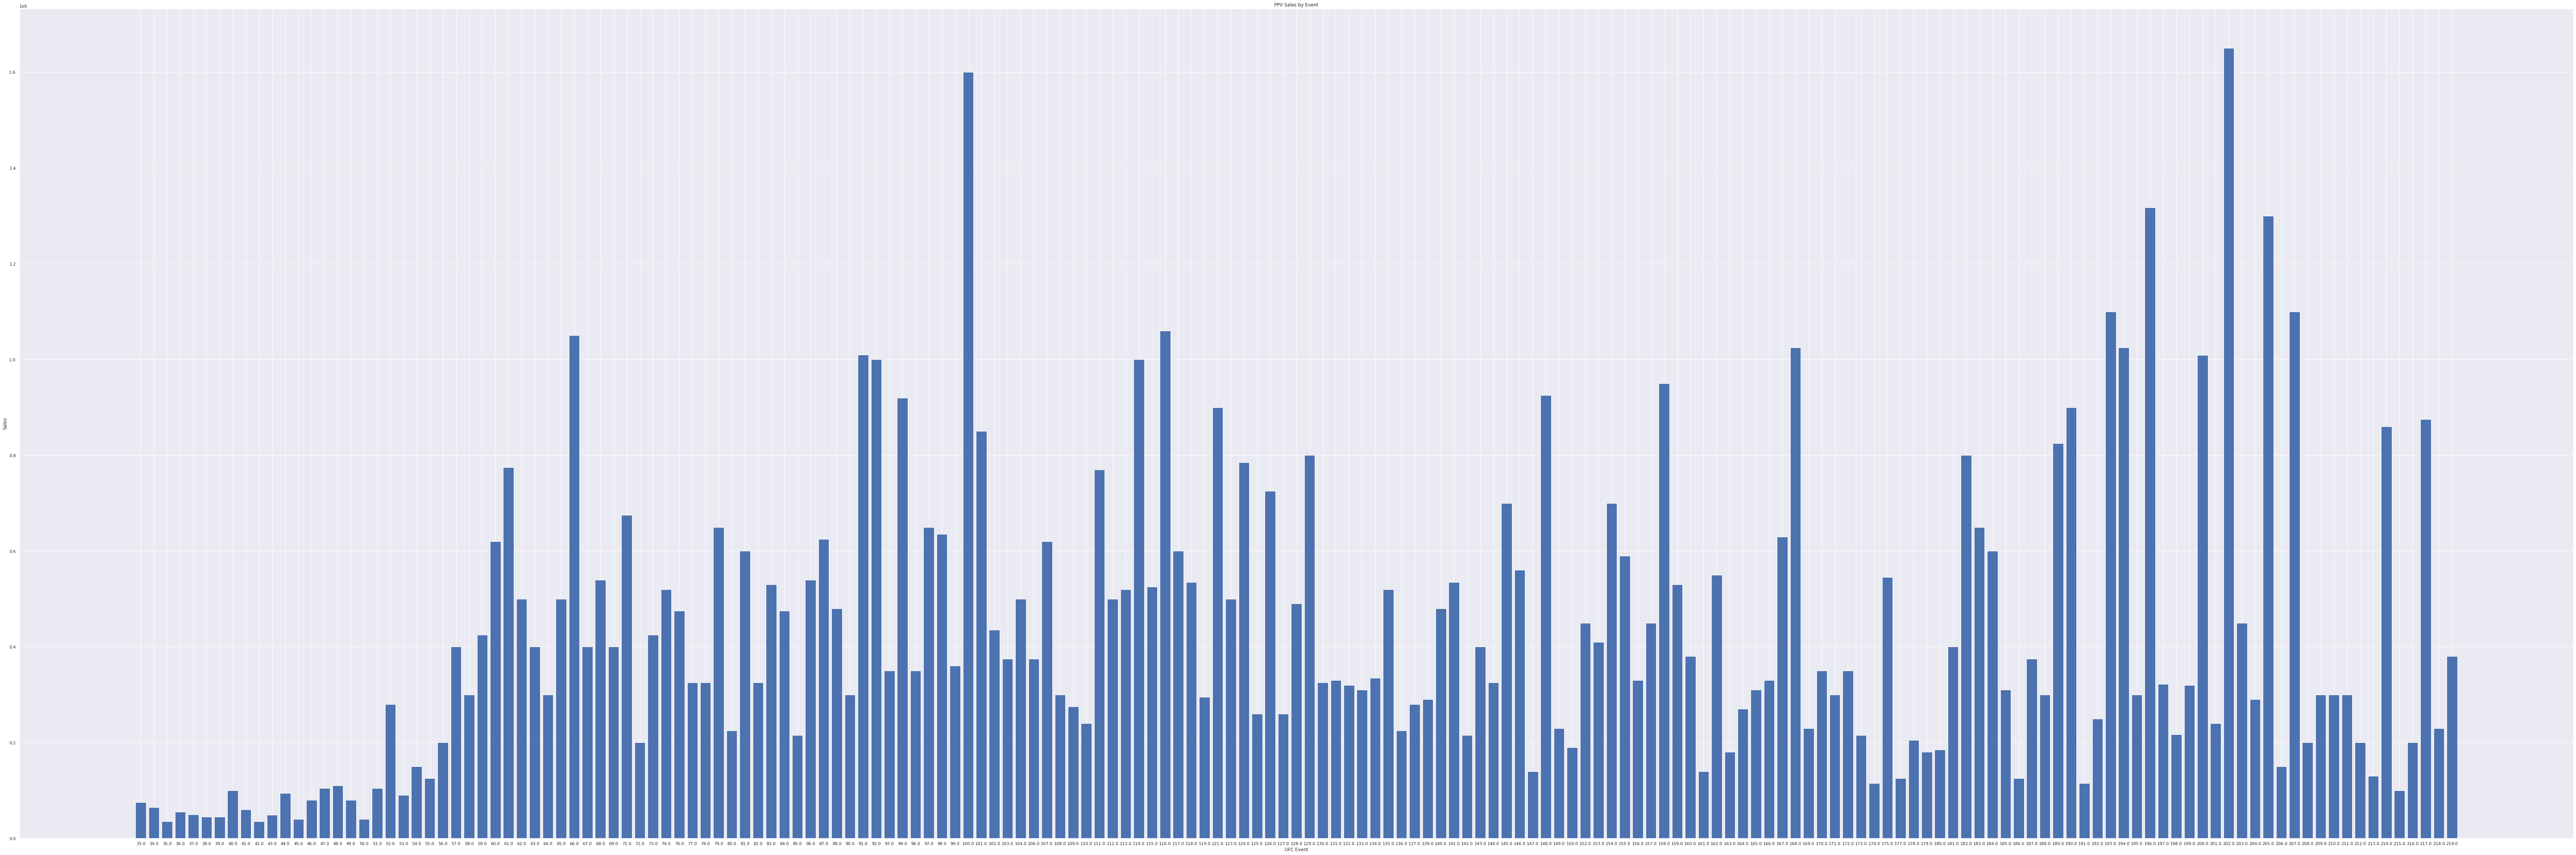

In [ ]:
# PPV buys sum for each UFC event
data = PPV_List
labels = UFC_Num_List
plt.figure(figsize=(120,40))
plt.xticks(range(len(data)), labels)
plt.xlabel('UFC Event')
plt.ylabel('Sales')
plt.title('PPV Sales by Event')
plt.bar(range(len(data)), data)
plt.show()

# Slide 3 visual

Given the above visual we can infer a few factors about the UFC:

- Even though there was a significant spike after The Ultimate Finale 1 it was still under $325k. So while a significant boost compared to the UFC's before it, the finale wasn't the spearhead into larger profits.

- UFC 57 was the first event to break passed $325k, which was the not only the fight between both coaches on the Ultimate Fighter (Chuck Liddell and Randy Couture, respectively) it was also the end of their trilogy. I believe THIS was the UFC event that normailzed much higher average sales.

- Sales numbers remained past $400k buys until UFC 147 (Rich Franklin and Wanderlei Silva 2), which was the "finale" for the Ultimate Fighter: Brazil. There were other dips in sales after, however this will not be explored for this presentation because the focus isn't related to lesser or poor sales.

- A few events broke the 1M mark in between UFC 57 and 147:
- UFC 66, Lidell v. Ortiz 2 was the first UFC event in its history that broke the 1M dollar barrier.
- Other events that broke the million dollar barrier include UFC's 91 and 92, 100, 114, 116, 168, 193 and 194, 196, 200, 202, 205 and lastly 207.
- UFC's rivalries that only broke the $325k included Liddell v. Couture 2, GSP v. Hughes 1, Cruz v. Faber, both Silva and Sonnen bouts, and Shamrock v. Ortiz 2.  
- Most UFC rivalries broke both barriers except for for those that preceeded UFC 52 (Liddell v. Couture 2).
- Every rivalry that had more than one fight saw a spike significantly larger than their previous fight.

After seeing this data I am certain both UFC 57 and UFC events that whose main cards included rivalry definetly had positive impacts on PPV sales.

To investigate futher I will be restructing the $325k benchmark I had set earlier with the median from PPV sales, creating more lists and dictionaries to both isolate UFC sales that didn't include these rivalries and those that do based on meeting both that median and exceeds 1 million dollar sales.



# Restructing benchmark and creating gap visuals

In [ ]:
# Finding the median for the PPV column
df.PPV.median()
# $350k is set as the new benchmark 

In [ ]:
display(df.describe())

In [ ]:
# Creating lists for UFC events that included rivalries listed and those that
# don't that made more than the median $350k but less than $1M, and those that broke
# 1M in sales.

# All UFC events featuring rivalries as a main event
UFC_Rival_List = ['40.0',   '47.0',  '61.0',   '65.0',   '66.0',     '69.0',   '79.0',   '81.0',   '83.0',   '92.0',    '100.0',   '132.0',  '148.0',  '168.0',   '182.0',  '200.0',   '214.0']
PPV_Rival_List = [100000.0, 110000.0, 775000.0, 500000.0, 1050000.0,  400000.0, 650000.0, 600000.0, 530000.0, 1000000.0, 1600000.0, 320000.0, 925000.0, 1025000.0, 800000.0, 1009000.0, 860000.0]

# All UFC events above $350k, but below $1M
UFC_Below_Million_List = ['57.0',   '59.0',   '60.0',   '62.0',   '63.0',   '67.0',  '68.0',   '71.0',   '73.0',   '74.0',   '76.0',   '84.0',   '86.0',   '87.0',   '88.0',   '93.0',   '94.0',   '96.0',   '97.0',   '98.0',   '99.0',   '101.0',  '102.0',  '103.0',  '104.0',  '106.0',  '107.0',  '111.0',  '112.0',  '113.0',  '115.0',  '117.0',  '118.0',  '121.0',  '123.0',  '124.0',  '126.0',  '128.0',  '129.0',  '135.0',  '140.0',  '141.0',  '143.0',  '145.0',  '146.0',  '152.0',  '153.0',  '154.0',  '155.0',  '157.0',  '158.0',  '159.0',  '160.0',  '162.0',  '167.0',  '170.0',  '172.0',  '175.0',  '181.0',  '183.0',  '184.0',  '187.0',  '189.0',  '190.0',  '203.0',  '217.0',  '218.0',  '219.0']
PPV_Below_Million_List = [400000.0, 425000.0, 620000.0, 500000.0, 400000.0, 400000.0, 540000.0, 675000.0, 425000.0, 520000.0, 475000.0, 475000.0, 540000.0, 625000.0, 480000.0, 350000.0, 920000.0, 350000.0, 650000.0, 635000.0, 360000.0, 850000.0, 435000.0, 375000.0, 500000.0, 375000.0, 620000.0, 770000.0, 500000.0, 520000.0, 525000.0, 600000.0, 535000.0, 900000.0, 500000.0, 785000.0, 725000.0, 490000.0, 800000.0, 520000.0, 480000.0, 535000.0, 400000.0, 700000.0, 560000.0, 450000.0, 410000.0, 700000.0, 590000.0, 450000.0, 950000.0, 530000.0, 380000.0, 550000.0, 630000.0, 350000.0, 350000.0, 545000.0, 400000.0, 650000.0, 600000.0, 375000.0, 825000.0, 900000.0, 450000.0, 875000.0, 230000.0, 380000.0]

# All UFC events above $1M that aren't included in the rivalry lists
UFC_Above_Million_List = ['91.0',   '114.0',   '116.0',   '193.0',   '194.0',   '196.0',   '202.0',   '205.0',   '207.0']
PPV_Above_Million_List = [1010000.0, 1000000.0, 1060000.0, 1100000.0, 1025000.0, 1317000.0, 1650000.0, 1300000.0, 1100000.0]

In [ ]:
# Taking all these figures and separating them allows me to see how frequent
# the UFC's events sold well based on rivalries as compared to other events,
# measuring also how often million dollar buys were cleared.
plt.hist(PPV_Rival_List, edgecolor='blue', bins = [300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000], label='Rivalries')
plt.hist(PPV_Below_Million_List, edgecolor='red', alpha=0.5, bins = [300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000], label='<1M')
plt.hist(PPV_Above_Million_List, edgecolor='green', alpha=0.50, bins = [300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000], label='1M+')
plt.legend(loc='upper right')
plt.xlabel('Sales Figure')
plt.ylabel('Sales Frequency')
plt.show()

Although this doesn't tell me much about how successful rivalry buys were by volume, we can better see overall how often rivalries were pushed in the promotions history as seen in the blue bins, v. the staggering amount of promotions that did feature rivals.

To measure the impact rivalries may have better, I will be constructing one more set of lists similar to the bar graph I built above.

In [ ]:
# I used these lists to create a scatter plot to visually represent these figures 
# a bit easier to read per each event.
Rival_Adj_Event = ['33.0', '34.0', '35.0', '36.0', '37.0', '38.0', '39.0', '40.0', '41.0', '42.0', '43.0', '44.0', '45.0', '46.0', '47.0', '48.0', '49.0', '50.0', '51.0', '52.0', '53.0', '54.0', '55.0', '56.0', '57.0', '58.0', '59.0', '60.0', '61.0', '62.0', '63.0', '64.0', '65.0', '66.0', '67.0', '68.0', '69.0', '71.0', '72.0', '73.0', '74.0', '76.0', '77.0', '78.0', '79.0', '80.0', '81.0', '82.0', '83.0', '84.0', '85.0', '86.0', '87.0', '88.0', '90.0', '91.0', '92.0', '93.0', '94.0', '96.0', '97.0', '98.0', '99.0', '100.0', '101.0', '102.0', '103.0', '104.0', '106.0', '107.0', '108.0', '109.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '121.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '130.0', '131.0', '132.0', '133.0', '134.0', '135.0', '136.0', '137.0', '139.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '149.0', '150.0', '152.0', '153.0', '154.0', '155.0', '156.0', '157.0', '158.0', '159.0', '160.0', '161.0', '162.0', '163.0', '164.0', '165.0', '166.0', '167.0', '168.0', '169.0', '170.0', '171.0', '172.0', '173.0', '174.0', '175.0', '177.0', '178.0', '179.0', '180.0', '181.0', '182.0', '183.0', '184.0', '185.0', '186.0', '187.0', '188.0', '189.0', '190.0', '191.0', '192.0', '193.0', '194.0', '195.0', '196.0', '197.0', '198.0', '199.0', '200.0', '201.0', '202.0', '203.0', '204.0', '205.0', '206.0', '207.0', '208.0', '209.0', '210.0', '211.0', '212.0', '213.0', '214.0', '215.0', '216.0', '217.0', '218.0', '219.0']
Rival_Adj_Sale = [0.0, 0.0,    0.0,     0.0,    0.0,    0.0,    0.0,    0.0,    100000.0, 0.0,  0.0,    0.0,    0.0,    0.0,    0.0,   110000.0, 0.0,   0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    775000.0, 0.0,  0.0,    0.0,    500000.0, 1050000.0,    0.0,    400000.0, 0.0,  0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    650000.0, 0.0,  600000.0, 0.0,  530000.0, 0.0,  0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    1000000.0, 0.0, 0.0,    0.0,    0.0,    0.0,    0.0,    1600000.0, 0.0,   0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     320000.0, 0.0,    0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     925000.0, 0.0,    0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     1025000.0, 0.0,   0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     800000.0, 0.0,    0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     1009000.0, 0.0,   0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     860000.0, 0.0,    0.0,     0.0,     0.0,     0.0]         

Below_1M_Event = ['33.0', '34.0', '35.0', '36.0', '37.0', '38.0', '39.0', '40.0', '41.0', '42.0', '43.0', '44.0', '45.0', '46.0', '47.0', '48.0', '49.0', '50.0', '51.0', '52.0', '53.0', '54.0', '55.0', '56.0', '57.0', '58.0', '59.0', '60.0', '61.0', '62.0', '63.0', '64.0', '65.0', '66.0', '67.0', '68.0', '69.0', '71.0', '72.0', '73.0', '74.0', '76.0', '77.0', '78.0', '79.0', '80.0', '81.0', '82.0', '83.0', '84.0', '85.0', '86.0', '87.0', '88.0', '90.0', '91.0', '92.0', '93.0', '94.0', '96.0', '97.0', '98.0', '99.0', '100.0', '101.0', '102.0', '103.0', '104.0', '106.0', '107.0', '108.0', '109.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '121.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '130.0', '131.0', '132.0', '133.0', '134.0', '135.0', '136.0', '137.0', '139.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '149.0', '150.0', '152.0', '153.0', '154.0', '155.0', '156.0', '157.0', '158.0', '159.0', '160.0', '161.0', '162.0', '163.0', '164.0', '165.0', '166.0', '167.0', '168.0', '169.0', '170.0', '171.0', '172.0', '173.0', '174.0', '175.0', '177.0', '178.0', '179.0', '180.0', '181.0', '182.0', '183.0', '184.0', '185.0', '186.0', '187.0', '188.0', '189.0', '190.0', '191.0', '192.0', '193.0', '194.0', '195.0', '196.0', '197.0', '198.0', '199.0', '200.0', '201.0', '202.0', '203.0', '204.0', '205.0', '206.0', '207.0', '208.0', '209.0', '210.0', '211.0', '212.0', '213.0', '214.0', '215.0', '216.0', '217.0', '218.0', '219.0']
Below_1M_Sale  = [0.0, 0.0,     0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    400000.0, 0.0,  425000.0, 620000.0, 0.0, 500000.0, 400000.0, 0.0, 0.0, 0.0, 400000.0, 540000.0, 0.0, 0.0, 675000.0, 0.0, 425000.0, 520000.0, 0.0, 475000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 475000.0, 0.0, 540000.0, 625000.0, 480000.0, 0.0, 0.0, 0.0, 0.0, 350000.0, 920000.0, 0.0, 350000.0, 650000.0, 635000.0, 360000.0, 0.0, 850000.0, 435000.0, 375000.0, 500000.0, 0.0, 375000.0, 620000.0, 0.0, 0.0, 0.0, 770000.0, 500000.0, 520000.0, 0.0, 525000.0, 0.0, 600000.0, 535000.0, 0.0, 0.0, 900000.0, 0.0, 500000.0, 785000.0, 0.0, 725000.0, 0.0, 490000.0, 800000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 520000.0, 0.0, 0.0, 0.0, 0.0, 480000.0, 535000.0, 0.0, 400000.0, 0.0, 700000.0, 560000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 450000.0, 410000.0, 700000.0, 590000.0, 0.0, 450000.0, 950000.0, 530000.0, 380000.0, 0.0, 550000.0, 0.0, 0.0, 0.0, 0.0, 630000.0, 0.0, 0.0, 350000.0, 0.0, 350000.0, 0.0, 0.0, 545000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 400000.0, 0.0, 650000.0, 600000.0, 0.0, 0.0, 375000.0, 0.0, 825000.0, 900000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 450000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 875000.0, 230000.0, 380000.0]

Above_1M_Adj_Event = ['33.0', '34.0', '35.0', '36.0', '37.0', '38.0', '39.0', '40.0', '41.0', '42.0', '43.0', '44.0', '45.0', '46.0', '47.0', '48.0', '49.0', '50.0', '51.0', '52.0', '53.0', '54.0', '55.0', '56.0', '57.0', '58.0', '59.0', '60.0', '61.0', '62.0', '63.0', '64.0', '65.0', '66.0', '67.0', '68.0', '69.0', '71.0', '72.0', '73.0', '74.0', '76.0', '77.0', '78.0', '79.0', '80.0', '81.0', '82.0', '83.0', '84.0', '85.0', '86.0', '87.0', '88.0', '90.0', '91.0', '92.0', '93.0', '94.0', '96.0', '97.0', '98.0', '99.0', '100.0', '101.0', '102.0', '103.0', '104.0', '106.0', '107.0', '108.0', '109.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '121.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '130.0', '131.0', '132.0', '133.0', '134.0', '135.0', '136.0', '137.0', '139.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '149.0', '150.0', '152.0', '153.0', '154.0', '155.0', '156.0', '157.0', '158.0', '159.0', '160.0', '161.0', '162.0', '163.0', '164.0', '165.0', '166.0', '167.0', '168.0', '169.0', '170.0', '171.0', '172.0', '173.0', '174.0', '175.0', '177.0', '178.0', '179.0', '180.0', '181.0', '182.0', '183.0', '184.0', '185.0', '186.0', '187.0', '188.0', '189.0', '190.0', '191.0', '192.0', '193.0', '194.0', '195.0', '196.0', '197.0', '198.0', '199.0', '200.0', '201.0', '202.0', '203.0', '204.0', '205.0', '206.0', '207.0', '208.0', '209.0', '210.0', '211.0', '212.0', '213.0', '214.0', '215.0', '216.0', '217.0', '218.0', '219.0']
Above_1M_Adj_Sale = [0.0,     0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    1010000.0, 0.0, 0.0,    0.0,    0.0,    0.0,    0.0,    0.0,    0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     1000000.0, 0.0,   1060000.0, 0.0,   0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     1100000.0, 1025000.0, 0.0, 1317000.0, 0.0,   0.0,     0.0,     0.0,     0.0,     1650000.0, 0.0,   0.0,     1300000.0, 0.0,   1100000.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0]

Rival_dict = dict(zip(UFC_Num_List, Rival_Adj_Sale))
Below_1M_dict = dict(zip(UFC_Num_List, Below_1M_Sale))
Above_1M_dict = dict(zip(UFC_Num_List, Above_1M_Adj_Sale))

Adj_UFC_Sales_df = pd.DataFrame(Rival_dict, Below_1M_dict, Above_1M_dict)
# I did create a few dictionaries that weren't utlized in ways that I hoped, but
# maybe I will do something with them in the future so I'm keeping them in.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f14395442e8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f1440669e80>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f1439544358>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


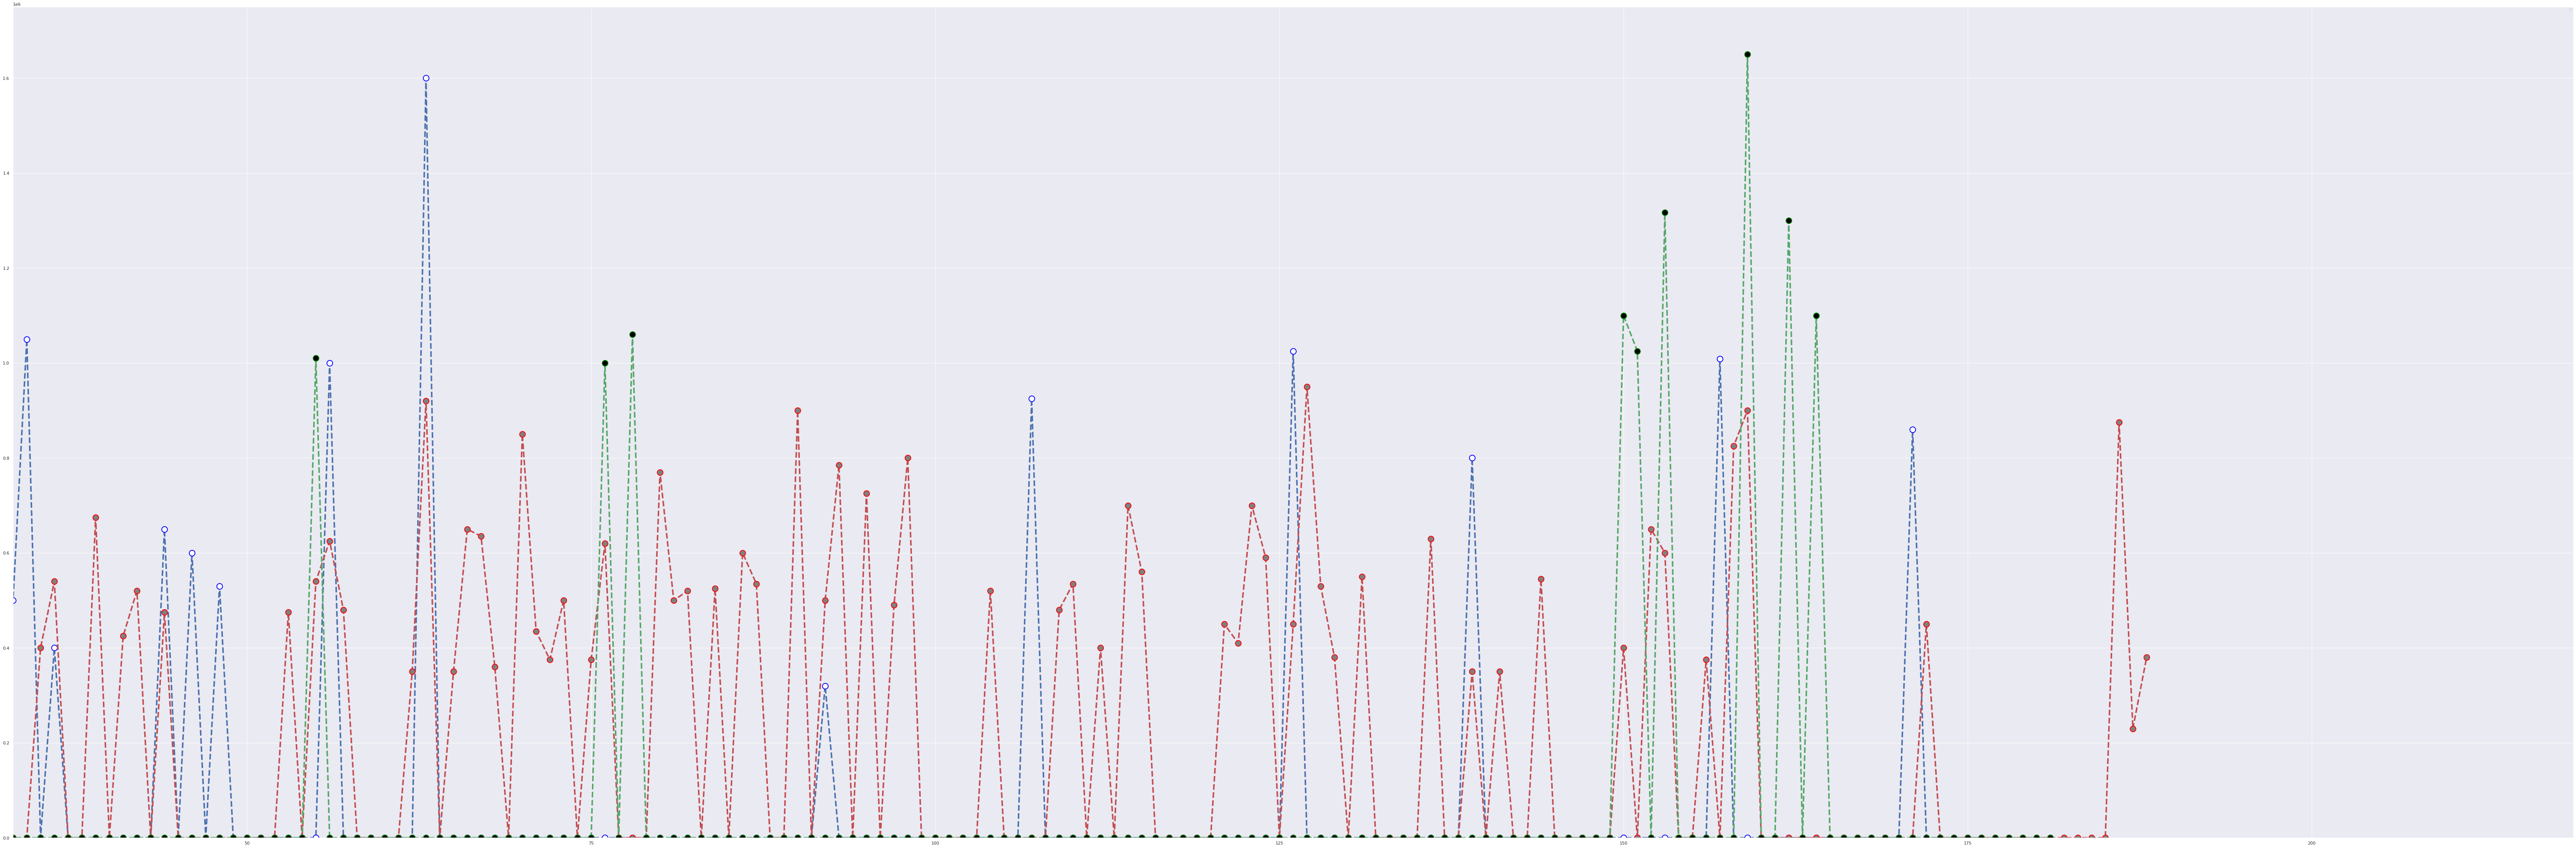

In [ ]:
plt.figure(figsize=(120,40))
Riv = plt.plot(Rival_Adj_Sale, marker='o', linestyle='--', color='b',
                  markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='blue',
         markeredgewidth=2)
Med = plt.plot(Below_1M_Sale, marker='o', linestyle='--', color='r',
                           markersize=15, linewidth=4,
         markerfacecolor='grey',
         markeredgecolor='red',
         markeredgewidth=2)
Mil = plt.plot(Above_1M_Adj_Sale, marker='o', linestyle='--', color='g',
                           markersize=15, linewidth=4,
         markerfacecolor='black',
         markeredgecolor='green',
         markeredgewidth=2)
plt.xlim(33, 219)
plt.ylim(0, 1750000)

plt.legend((Riv, Med, Mil),
            ('Rival Headliner', 'Typical_Event', '1M+'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)

plt.show()

This is the exact same data as the bar chart above, except now color coded to know the differences in categories that I had created. Turns out the highest grossing fights were not necessarily for any rivalry aspect as a whole. The highest selling PPV's actually had little or nothing to do with rivalry, instead the sales figures seems to favor major turning events in the promotions history with UFC 100 and 200 both making the most, where most of the other events actually sold as well or slightly better.

This concludes my analysis on the data, however I am leaving some queries and viz on this project for later manipulation. The T-tests I performed are below. None of those were that helpful since I ultimately abondened looking for statistical reasoning for the higher sales, however they are still required for this project. In the future I may split the data more to test the financial data against itself.

In conclusion, rivalries didn't necessarily increase the chance for higher sales. Instead what is apparent was The Ultimate Fighter Finale 1 did boost sales by double and for the most part has remained there. We also found that Ronda Rouseys' fight at 168 also boosted sales for several events after suggesting the inclusion of the women's divison also increased PPV buys. Mostly and finally, Brock Lesnar fighting on average made the company more than average, however the age of the event itself (UFC 100 and 200 respectively) had the biggest impacts on sales.

T-Tests

In [ ]:
# T-test between # of rounds and Red wins
stats.pearsonr(UFC['no_of_rounds'], UFC['R_wins'])

(0.3279925908107043, 2.90697359762908e-105)

In [ ]:
# T-test between # of rounds and Blue wins
stats.pearsonr(UFC['no_of_rounds'], UFC['B_wins'])

(0.3458911197142931, 1.2964135702654541e-117)

In [ ]:
# T-test Red wins Blue wins
stats.pearsonr(UFC['R_wins'], UFC['B_wins'])

(0.5118556176108819, 1.4209215262346062e-277)

In [ ]:
UFC[['R_Height_cms',	'R_Reach_cms',	'R_Weight_lbs']].corr()

,R_Height_cms,R_Reach_cms,R_Weight_lbs
R_Height_cms,1.000000,0.889173,0.786214
R_Reach_cms,0.889173,1.000000,0.751772
R_Weight_lbs,0.786214,0.751772,1.000000


In [ ]:
UFC[['B_Height_cms',	'B_Reach_cms',	'B_Weight_lbs']].corr()

,B_Height_cms,B_Reach_cms,B_Weight_lbs
B_Height_cms,1.000000,0.883081,0.781998
B_Reach_cms,0.883081,1.000000,0.751807
B_Weight_lbs,0.781998,0.751807,1.000000


In [ ]:
UFC[['R_win_by_KO/TKO',	'R_win_by_Submission',	'R_win_by_TKO_Doctor_Stoppage']].corr()

,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage
R_win_by_KO/TKO,1.000000,0.170098,0.238667
R_win_by_Submission,0.170098,1.000000,0.108887
R_win_by_TKO_Doctor_Stoppage,0.238667,0.108887,1.000000


In [ ]:
UFC[['B_win_by_KO/TKO',	'B_win_by_Submission',	'B_win_by_TKO_Doctor_Stoppage']].corr()

,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage
B_win_by_KO/TKO,1.000000,0.190882,0.284689
B_win_by_Submission,0.190882,1.000000,0.106470
B_win_by_TKO_Doctor_Stoppage,0.284689,0.106470,1.000000


# Queries

These queries helped me sift through the data to assist finding my insights and establish my strategies in approaching this project.

In [ ]:
# Listing if all red corner fighters showing KO/TKO, Submission, and Dr Stoppage 
# columns then grouped by blue corner fighters.
df[['B_fighter', 'UFC_Number', 'B_win_by_KO/TKO', 'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage']].groupby(['B_fighter']).agg(['mean', 'count'])

In [ ]:
# df[['R_fighter', 'UFC_Number', 'R_win_by_KO/TKO']].groupby(['R_win_by_KO/TKO', 'R_fighter']).agg(['sum'])
# df[['R_fighter', 'UFC_Number', 'R_win_by_Submission']].groupby(['R_win_by_Submission', 'R_fighter']).agg(['sum'])
# df[['R_fighter', 'UFC_Number', 'R_win_by_TKO_Doctor_Stoppage']].groupby(['R_win_by_TKO_Doctor_Stoppage', 'R_fighter']).agg(['sum'])

# This will organize totals for each column that is placed 1st in the ".groupby(" portion of the code for red corner fighters.

df[['R_fighter', 'UFC_Number', 'R_win_by_KO/TKO']].groupby(['R_win_by_KO/TKO', 'R_fighter']).agg(['sum'])

In [ ]:
# df[['B_fighter', 'UFC_Number', 'B_win_by_KO/TKO']].groupby(['B_win_by_KO/TKO', 'B_fighter']).agg(['sum'])
# df[['B_fighter', 'UFC_Number', 'B_win_by_Submission']].groupby(['B_win_by_Submission', 'B_fighter']).agg(['sum'])
# df[['B_fighter', 'UFC_Number', 'B_win_by_TKO_Doctor_Stoppage']].groupby(['B_win_by_TKO_Doctor_Stoppage', 'B_fighter']).agg(['sum'])

# This will organize totals for each column that is placed 1st in the ".groupby(" portion of the code for blue corner fighters.

df[['B_fighter', 'UFC_Number', 'B_win_by_KO/TKO']].groupby(['B_win_by_KO/TKO', 'B_fighter']).agg(['sum'])

Essentially the statistical data I looked through didn't point to any indication of ability correlating with larger sales for the UFC.

Visualizations

Some of the visualzations I created to look through the statistcal data more.

In [ ]:
# Correlation between winning corner and PPV_Sales
# UFC 100 and 200 jump out as having the highest sales from this viz.
# Several other events crossed the $1M mark, with an event before and after 200 
# having 3rd and 4th highest buys.
plt.figure(figsize=(60, 20))
sns.scatterplot(x="UFC_Number", y="PPV", hue="Winner", data=df)

In [ ]:
plt.figure(figsize=(120, 40))
sns.scatterplot(x="UFC_#", y="PPV", hue="R_fighter", data=df)

In [ ]:
# These are the frequency of events per fight
# This excludes both Las Vegas with 1200 matches,
# and London with 110 matches.
# Least visited locations removed as well

fig, ax = plt.subplots(figsize=(15,6))
gdata = df['location'].value_counts()
y_data = gdata[2:].head(20).values
x_data = gdata[2:].head(20).index
ax.plot(x_data, y_data)
plt.xlabel('Location')
plt.ylabel('# of Events')
plt.title('# of Fights by Location')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Correlation test between # of rounds and Red wins
stats.pearsonr(UFC['no_of_rounds'], UFC['R_wins'])

In [ ]:
# Split data for t-test
UFC_R = UFC.loc[UFC['Winner'] == 'Red']
UFC_B = UFC.loc[UFC['Winner'] == 'Blue']

Unused viz and calls

In [ ]:
UFC_R.head()

In [ ]:
UFC_B.head()

In [ ]:
# Find counts for PPV_Sales
# Are there correlations between the most common sales figures in the data?
df['PPV_Sales'].value_counts()

In [ ]:
# Find counts for UFC_#
# This indicates how many buys each event had
UFC['UFC_#'].value_counts()

In [ ]:
# Find counts for the weight classes
UFC['weight_class'].value_counts()

In [ ]:
# Plot the distribution of red and blue corner fighters 
# with histograms
sns.distplot(df["PPV"])
# Follows an approx normal dist

In [ ]:
# Plot the distribution of red and blue corner fighters 
# with histograms
sns.distplot(UFC_B["B_current_win_streak"])
# Follows an approx normal dist

In [ ]:
# Find counts for fighting corner color
UFC['Winner'].value_counts()

In [ ]:
# Pairplot of UFC DataFrame’s win_by Red columns
plt.figure(figsize=(120, 40))
sns.pairplot(UFC, vars = ['R_win_by_KO/TKO', 'R_win_by_Submission', 'R_win_by_TKO_Doctor_Stoppage'])

In [ ]:
# Pairplot of UFC DataFrame’s win_by Blue columns
plt.figure(figsize=(120, 40))
sns.pairplot(UFC, vars = ['B_win_by_KO/TKO', 'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage'])

In [ ]:
# Scatterplot of weight division and number of rounds,
# with ring corner winner represented by color
sns.scatterplot(x='weight_class', y='no_of_rounds', hue='Winner', data=df)